# Visualisations

This file contains our data visualisations and cleaning of the data.

In [ ]:
# Put the imports here, this makes it easy to create a requirements.txt file
# later, which can be used by whoever is grading us to install everything!
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('./data/alzheimers_disease_data.csv', 'r') as f:
    lines = f.readlines()

header = lines[0].strip().split(',')
data = {column: [] for column in header}
for line in lines[1:]:
    values = line.strip().split(',')
    for i, value in enumerate(values):
        try:
            num = float(value)
            num = int(num) if num.is_integer() else num
            data[header[i]].append(num)
        except ValueError:
            data[header[i]].append(value)

# Accessing data (per column) can be done in the following way:
column = data['PatientID']
print(column)

# To see all column names:
print(data.keys())

[4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 491

## Internal and external factors

The dataset contains all sorts of different metrics for a patient. These metrics can be divided into three categories:
- Metadata: `PatientID`, `Diagnosis` and `DoctorInCharge` (since this one is just the same value everywhere)
- Internal factors: `Age`, `Gender`, `Ethnicity`, `BMI`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks` and `Forgetfulness`
- External factors: `EducationLevel`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality` and `SleepQuality`

The metadata is not important for the tests and experiments on the data, as this says nothing about the condition of the patient. The only column here that is important is `Diagnosis`, as it tells us whether or not a patient actually has Alzheimer's disease. This is, for example, the target vector we can use for a regression model.

The internal and external factors can be examined, since these actually tell us something about the health of the patient. These could have an effect on whether or not someone has Alzheimer's disease and therefore they can be used to, for example, make predictions.

In [8]:
# Split the dataset into the three categories described above:
metadata_keys = ["PatientID", "Diagnosis", "DoctorInCharge"]
internal_factors_keys = [
    "Age", "Gender", "Ethnicity", "BMI", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "Hypertension",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment",
    "MemoryComplaints", "BehavioralProblems", "ADL", "Confusion",
    "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Forgetfulness"
]
external_factors_keys = ["EducationLevel", "Smoking", "AlcoholConsumption",
                         "PhysicalActivity", "DietQuality", "SleepQuality"]

metadata = {key: data[key] for key in metadata_keys if key in data}
internal_factors = {key: data[key] for key in internal_factors_keys if key in data}
external_factors = {key: data[key] for key in external_factors_keys if key in data}

print("Metadata:", list(metadata.keys()))
print("Internal Factors:", list(internal_factors.keys()))
print("External Factors:", list(external_factors.keys()))

Metadata: ['PatientID', 'Diagnosis', 'DoctorInCharge']
Internal Factors: ['Age', 'Gender', 'Ethnicity', 'BMI', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
External Factors: ['EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']


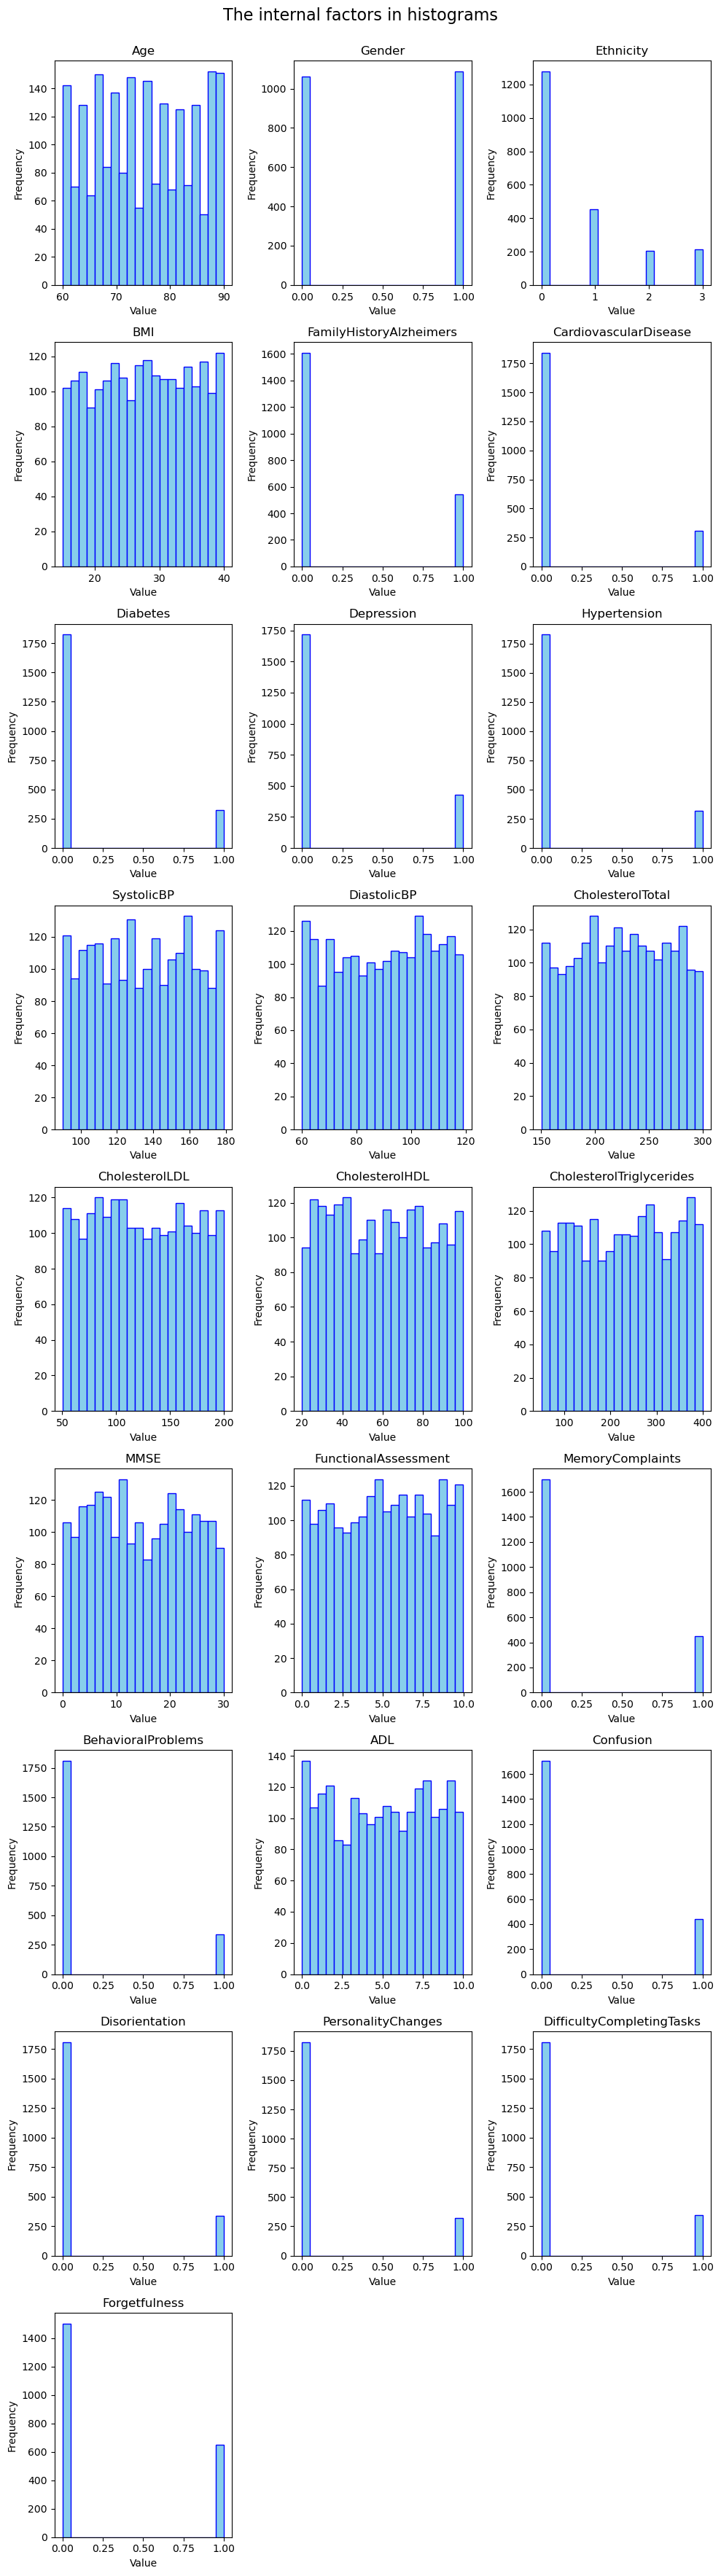

In [ ]:
# Plot the internal factors into an image with two columns
num_plots = len(internal_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The internal factors in histograms', fontsize=16)
axes = axes.flatten()

for i, (key, values) in enumerate(internal_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

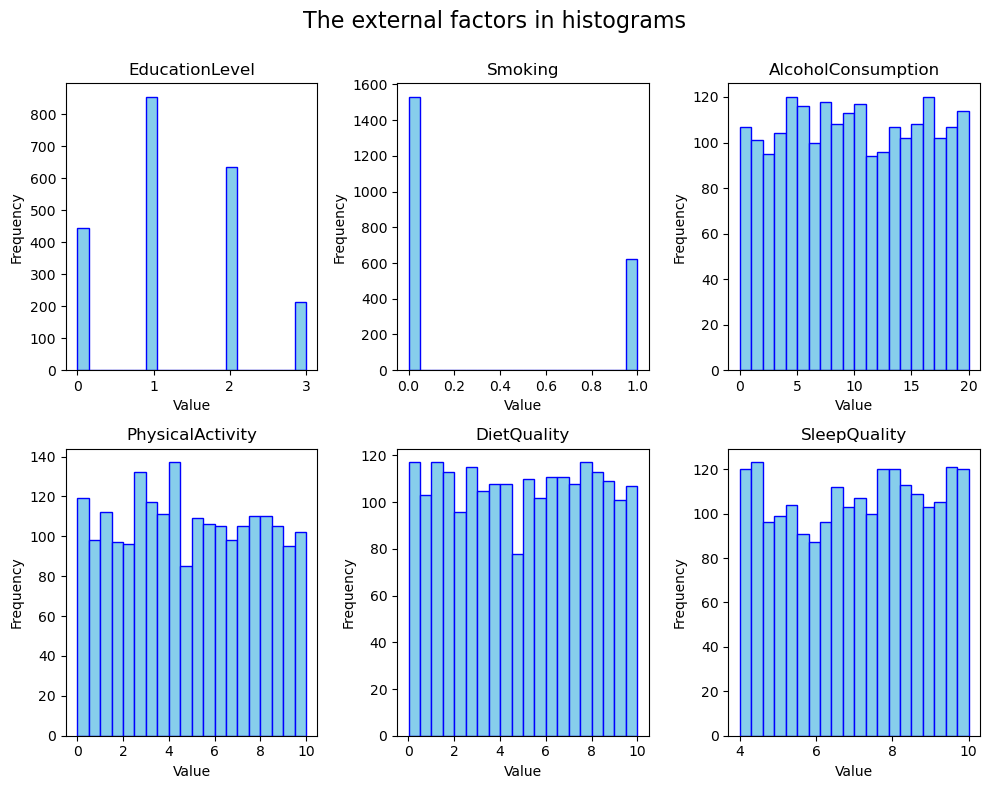

In [23]:
# Plot the external factors into an image with two columns
num_plots = len(external_factors)
columns = 3
rows = (num_plots + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(10, rows * 4))
fig.suptitle('The external factors in histograms', fontsize=16)
axes = axes.flatten()

for i, (key, values) in enumerate(external_factors.items()):
    axes[i].hist(values, bins=20, color='skyblue', edgecolor='blue')
    axes[i].set_title(key)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()